In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-01-16-sync-genomes/data/get_homologues_cluster_size_analysis.csv"

In [4]:
# This was run with -e flag to exclude all paralogs

gh_df = pd.read_csv(data, index_col=[0, 1])
gh_df.fillna(0, inplace=True)
test = gh_df.loc["id_C75_S1"]
test.drop(0.0, axis='index', inplace=True)
gh_df.head()

COG   OCML    pan
          Unnamed: 1                      
id_C50_S1 0.0            0.0    0.0    1.0
          1.0         4995.0    0.0    0.0
          2.0         1001.0  966.0  859.0
          3.0          488.0  483.0  403.0
          4.0          371.0  363.0  313.0

In [46]:
x = list(test.index)
pan = test.pan
pan

Unnamed: 1
1.0        0.0
2.0     1095.0
3.0      483.0
4.0      311.0
5.0      203.0
6.0      143.0
7.0      114.0
8.0       73.0
9.0       55.0
10.0      69.0
11.0      93.0
12.0      85.0
13.0      79.0
14.0     202.0
15.0     665.0
16.0    2026.0
Name: pan, dtype: float64

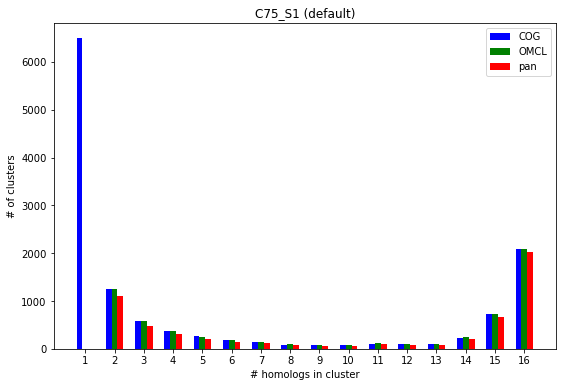

In [53]:
ax = plt.subplot(111)

x1 = [x-0.2 for x in list(test.index)]
x2 = list(test.index)
x3 = [x+0.2 for x in list(test.index)]

ax.bar(x1, test.COG, width=0.2, color='b', align='center')
ax.bar(x2, test.OCML, width=0.2, color='g', align='center')
ax.bar(x3, test.pan, width=0.2, color='r', align='center')
ax.set_xticks(list(test.index));
ax.set_title("C75_S1 (default)")
ax.set_xlabel("# homologs in cluster")
ax.set_ylabel("# of clusters")
f = plt.gcf()
f.set_size_inches(9,6)
ax.legend(["COG", "OMCL", "pan"])

In [54]:
conditions = list(gh_df.index.levels[0])
conditions

['id_C50_S1',
 'id_C50_S70',
 'id_C50_S90',
 'id_C60_S1',
 'id_C60_S70',
 'id_C60_S90',
 'id_C70_S1',
 'id_C70_S70',
 'id_C70_S90',
 'id_C75_S1',
 'id_C75_S70',
 'id_C75_S90']

In [127]:

def plotClusterSizes(C, S): #both could be lists
    
    fig, axs = plt.subplots(len(C),len(S), sharex=True, sharey=True)
    
    fig.set_size_inches(20.5, 14.5)
    conds = [(c,s) for c in C for s in S]
    coords = [(x, y) for x in range(len(C))for y in range(len(S))]
    for co, cd in zip(coords, conds):
        df = gh_df.loc["id_C{}_S{}".format(cd[0], cd[1])]  
        df.drop(0.0, axis='index', inplace=True)
        x = list(df.index)
        pan = df.pan
        a = axs[co[0], co[1]]
        a.bar(x, pan)
        a.set_title("C{}_S{}".format(cd[0], cd[1]))
        a.set_xlabel("# homologs in cluster")
        a.set_ylabel("# of clusters")
        a.set_xticks(list(x))
    

[(50, 1), (50, 70), (50, 90), (60, 1), (60, 70), (60, 90), (70, 1), (70, 70), (70, 90), (75, 1), (75, 70), (75, 90)]
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]


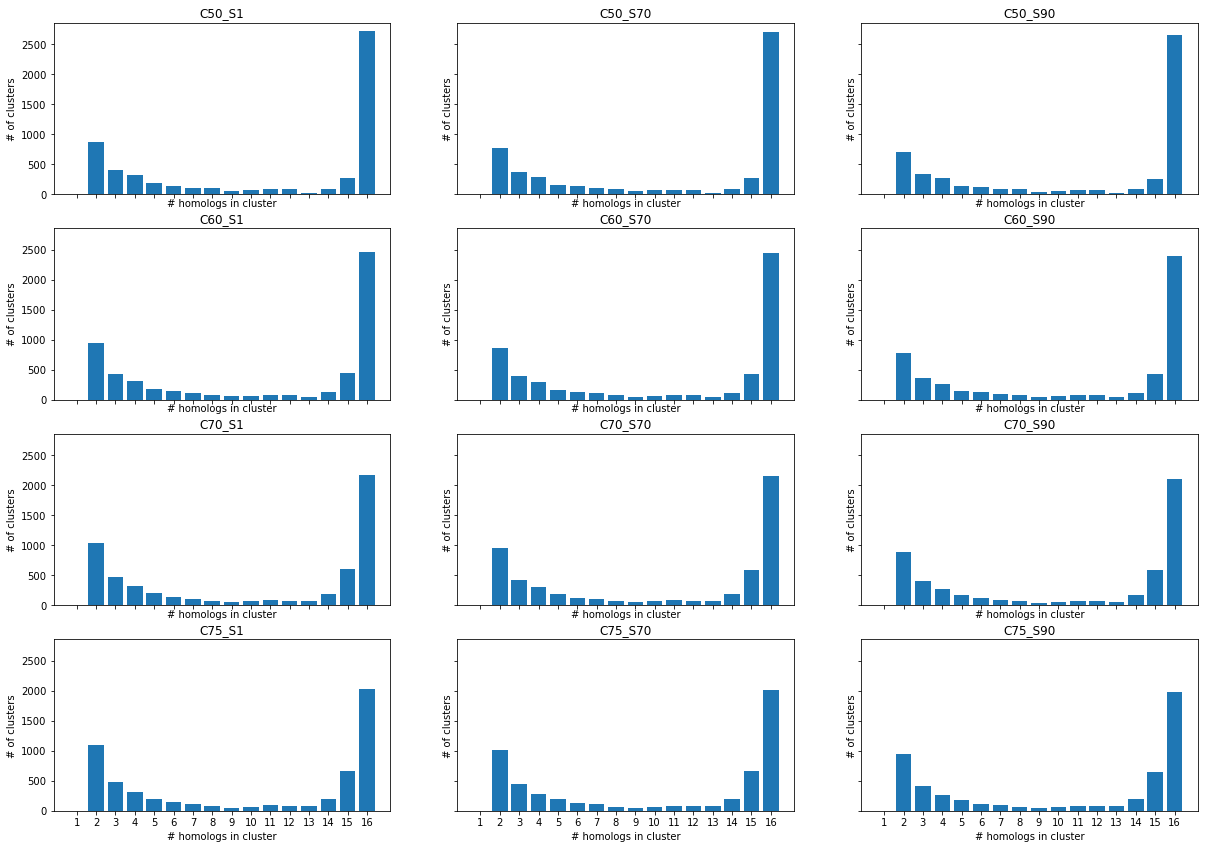

In [128]:

C = [50, 60, 70, 75]
S = [1,70,90]
plotClusterSizes(C, S)

In [140]:
# Genome composition analysis 

# This data are from original get_homologue ran under default parameters

pangenome = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-01-16-sync-genomes/data/genomes_homologues/pan_genome_algOMCL.tab"
pangenome_df = pd.read_csv(pangenome, sep = "\t")
pangenome_df.drop(["Unnamed: 16"], axis = 1, inplace = True)
df = pangenome_df.T
df.index = [i.split('g')[1] for i in list(df.index)]
df

,0,1,2,3,4,5,6,7,8,9
1,5159,5832,4671,4671,4614,4908,4749,4862,4614,4862
2,5774,6353,5091,5320,5198,5329,5160,5516,5160,5470
3,6007,6641,5540,5637,5509,5566,5554,5797,5431,6252
4,6365,6777,5738,5933,5763,5873,5789,6005,5634,6646
5,6657,6946,6498,6114,6058,6161,6158,6289,5935,7409
6,6840,7081,6601,6809,6338,6494,6434,6466,6133,7591
7,6963,7761,7148,6898,6835,7015,6555,6675,6816,7682
8,7151,7951,7320,7013,6935,7193,6669,6802,7075,7839
9,7385,8089,7494,7088,7130,7363,6749,7056,7269,7930
10,7604,8180,7550,7305,7257,7484,6962,7155,7334,8076


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


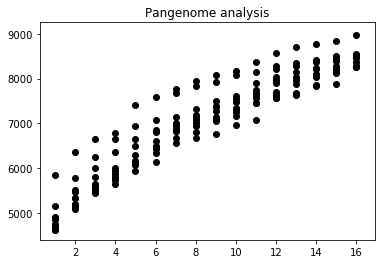

In [182]:
for i in range(0, 16):
    x = [i+1]*10
    y = df.iloc[i]
    plt.scatter(x,y, color = "k")

plt.title("Pangenome analysis")
f = plt.gcf()
ti = list(map(int, list(df.index)))
print(ti)
f.set_xticks = ti
f.ylabel = "# of genes"
     



In [183]:
test

,COG,OCML,pan
Unnamed: 1,,,
1.0,6497.0,0.0,0.0
2.0,1242.0,1243.0,1095.0
3.0,576.0,575.0,483.0
4.0,373.0,368.0,311.0
5.0,263.0,252.0,203.0
6.0,180.0,184.0,143.0
7.0,135.0,148.0,114.0
8.0,88.0,92.0,73.0
9.0,74.0,72.0,55.0


In [186]:
conditions = list(gh_df.index.levels[0])
conditions

['id_C50_S1',
 'id_C50_S70',
 'id_C50_S90',
 'id_C60_S1',
 'id_C60_S70',
 'id_C60_S90',
 'id_C70_S1',
 'id_C70_S70',
 'id_C70_S90',
 'id_C75_S1',
 'id_C75_S70',
 'id_C75_S90']

In [197]:
tot_genes_pan = {}
tot_genes_omcl = {}
for c in conditions:
    tot_genes_pan[c] = gh_df.loc[c].sum(axis=0).pan
    tot_genes_omcl[c] = gh_df.loc[c].sum(axis=0).OCML
    print(gh_df.loc[c].sum(axis=0))
tot_genes_omcl

COG     11001.0
OCML     5944.0
pan      5446.0
dtype: float64
COG     11001.0
OCML     6277.0
pan      5187.0
dtype: float64
COG     11001.0
OCML     6445.0
pan      4940.0
dtype: float64
COG     11712.0
OCML     6164.0
pan      5539.0
dtype: float64
COG     11712.0
OCML     6496.0
pan      5291.0
dtype: float64
COG     11712.0
OCML     6645.0
pan      5051.0
dtype: float64
COG     12436.0
OCML     6337.0
pan      5638.0
dtype: float64
COG     12436.0
OCML     6663.0
pan      5408.0
dtype: float64
COG     12436.0
OCML     6787.0
pan      5174.0
dtype: float64
COG     12858.0
OCML     6412.0
pan      5697.0
dtype: float64
COG     12858.0
OCML     6735.0
pan      5485.0
dtype: float64
COG     12858.0
OCML     6857.0
pan      5255.0
dtype: float64


{'id_C50_S1': 5944.0,
 'id_C50_S70': 6277.0,
 'id_C50_S90': 6445.0,
 'id_C60_S1': 6164.0,
 'id_C60_S70': 6496.0,
 'id_C60_S90': 6645.0,
 'id_C70_S1': 6337.0,
 'id_C70_S70': 6663.0,
 'id_C70_S90': 6787.0,
 'id_C75_S1': 6412.0,
 'id_C75_S70': 6735.0,
 'id_C75_S90': 6857.0}

In [198]:
tot_genes_pan

{'id_C50_S1': 5446.0,
 'id_C50_S70': 5187.0,
 'id_C50_S90': 4940.0,
 'id_C60_S1': 5539.0,
 'id_C60_S70': 5291.0,
 'id_C60_S90': 5051.0,
 'id_C70_S1': 5638.0,
 'id_C70_S70': 5408.0,
 'id_C70_S90': 5174.0,
 'id_C75_S1': 5697.0,
 'id_C75_S70': 5485.0,
 'id_C75_S90': 5255.0}

#### 2018-02-22
- Yesterday re-ran get_homologues with 24 different conditions on flux, now going to look at the distribution of cluster sizes and compare to the pangenome/core genome sizes predicted via simulation

In [5]:
import os
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-01-16-sync-genomes/data/test_gh_params/"
os.listdir(data)

['C60_S1_e0_cluster_sizes.csv',
 'C60_S90_e0_cluster_sizes.csv',
 'C60_S1_e1_cluster_sizes.csv',
 'C60_S90_e1_cluster_sizes.csv',
 'C60_S70_e1_cluster_sizes.csv',
 'C70_S1_e1_cluster_sizes.csv',
 'C60_S70_e0_cluster_sizes.csv',
 'C70_S1_e0_cluster_sizes.csv',
 'C75_S90_e0_cluster_sizes.csv',
 'C50_S90_e1_cluster_sizes.csv',
 'C50_S1_e1_cluster_sizes.csv',
 'C70_S70_e0_cluster_sizes.csv',
 'C75_S90_e1_cluster_sizes.csv',
 'C50_S90_e0_cluster_sizes.csv',
 'C50_S1_e0_cluster_sizes.csv',
 'C70_S70_e1_cluster_sizes.csv',
 'C70_S90_e1_cluster_sizes.csv',
 'C50_S70_e0_cluster_sizes.csv',
 'C75_S1_e1_cluster_sizes.csv',
 'C75_S70_e1_cluster_sizes.csv',
 'C70_S90_e0_cluster_sizes.csv',
 'C50_S70_e1_cluster_sizes.csv',
 'C75_S70_e0_cluster_sizes.csv',
 'C75_S1_e0_cluster_sizes.csv']

In [7]:
test = os.path.join(data, os.listdir(data)[0])
df_to_concat = []
for d in os.listdir(data):
    df = pd.read_csv(os.path.join(data, d), index_col = 0)
    df.columns = [d.split("cluster")[0]+c for c in list(df.columns)]
    df_to_concat.append(df)
clusters = pd.concat(df_to_concat, axis = 1)    
clusters.fillna(0, inplace=True)
clusters.drop(np.nan, axis=0, inplace=True)
#df = pd.concat([pd.read_csv(os.path.join(data, d), index_col=0) for d in os.listdir(data)], axis =1 )
clusters.head()

,C60_S1_e0_COG,C60_S1_e0_OMCL,C60_S1_e0_Intersection,C60_S90_e0_COG,C60_S90_e0_OMCL,C60_S90_e0_Intersection,C60_S1_e1_COG,C60_S1_e1_OMCL,C60_S1_e1_Intersection,C60_S90_e1_COG,...,C70_S90_e0_Intersection,C50_S70_e1_COG,C50_S70_e1_OMCL,C50_S70_e1_Intersection,C75_S70_e0_COG,C75_S70_e0_OMCL,C75_S70_e0_Intersection,C75_S1_e0_COG,C75_S1_e0_OMCL,C75_S1_e0_Intersection
1.0,5553.0,5294.0,4901.0,5553.0,6571.0,5032.0,5553.0,0.0,0.0,5553.0,...,5680.0,4995.0,0.0,0.0,6497.0,6984.0,5992.0,6497.0,6403.0,5926.0
2.0,1250.0,1202.0,1062.0,1250.0,1386.0,883.0,1097.0,1074.0,946.0,1097.0,...,988.0,1001.0,1114.0,770.0,1406.0,1519.0,1127.0,1406.0,1367.0,1210.0
3.0,578.0,566.0,479.0,578.0,641.0,399.0,507.0,504.0,429.0,507.0,...,436.0,488.0,507.0,361.0,657.0,665.0,482.0,657.0,637.0,534.0
4.0,427.0,411.0,341.0,427.0,462.0,291.0,389.0,370.0,312.0,389.0,...,299.0,371.0,394.0,287.0,421.0,450.0,319.0,421.0,416.0,347.0
5.0,274.0,283.0,218.0,274.0,309.0,170.0,232.0,230.0,183.0,232.0,...,186.0,223.0,227.0,157.0,302.0,311.0,214.0,302.0,300.0,231.0


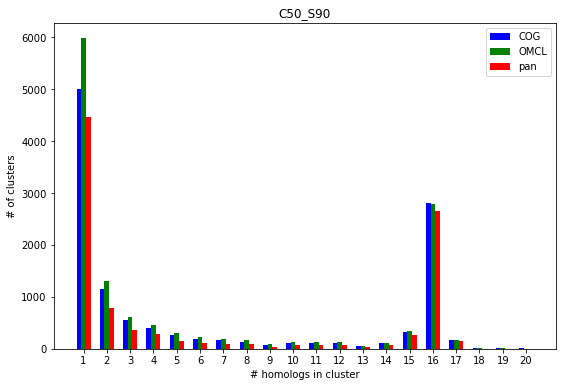

In [21]:
default = clusters[["C50_S90_e0_COG","C50_S90_e0_OMCL","C50_S90_e0_Intersection"]][0:20]
default.columns = ["COG", "OMCL", "Intersection"]
ax = plt.subplot(111)

x1 = [x-0.2 for x in list(default.index)]
x2 = list(default.index)
x3 = [x+0.2 for x in list(default.index)]
ax.bar(x1, default.COG, width=0.2, color='b', align='center')
ax.bar(x2, default.OMCL, width=0.2, color='g', align='center')
ax.bar(x3, default.Intersection, width=0.2, color='r', align='center')
ax.set_xticks(list(default.index));
ax.set_title("C50_S90")
ax.set_xlabel("# homologs in cluster")
ax.set_ylabel("# of clusters")
f = plt.gcf()
f.set_size_inches(9,6)
ax.legend(["COG", "OMCL", "pan"])

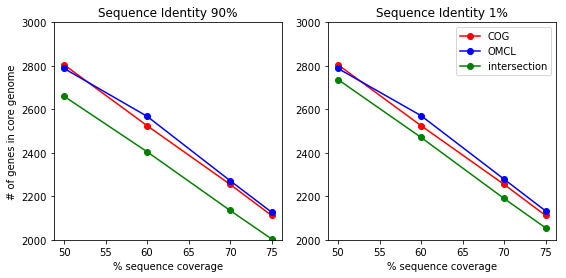

In [130]:
clusters_S90_e0 = clusters_e0[[c for c in clusters_e0.columns if "S90" in c]]
clusters_S1_e0 = clusters_e0[[c for c in clusters_e0.columns if "S1" in c]]

C = [50, 60, 70, 75]
f = plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.plot(C, clusters_S90_e0[["C{}_S90_e0_COG".format(str(c)) for c in C]].loc[16.0], "-or")
plt.plot(C, clusters_S90_e0[["C{}_S90_e0_OMCL".format(str(c)) for c in C]].loc[16.0], "-ob")
plt.plot(C, clusters_S90_e0[["C{}_S90_e0_Intersection".format(str(c)) for c in C]].loc[16.0], "-og")
plt.ylim(2000, 3000)

plt.ylabel("# of genes in core genome")
plt.xlabel("% sequence coverage")
plt.title("Sequence Identity 90%")
plt.subplot(122)
plt.plot(C, clusters_S1_e0[["C{}_S1_e0_COG".format(str(c)) for c in C]].loc[16.0], "-or", label = "COG")
plt.plot(C, clusters_S1_e0[["C{}_S1_e0_OMCL".format(str(c)) for c in C]].loc[16.0], "-ob", label = "OMCL")
plt.plot(C, clusters_S1_e0[["C{}_S1_e0_Intersection".format(str(c)) for c in C]].loc[16.0], "-og", label = "intersection")
plt.ylim(2000, 3000)
plt.xlabel("% sequence coverage")
plt.title("Sequence Identity 1%")
plt.legend()



[ 11935.  12620.  13354.  13783.]


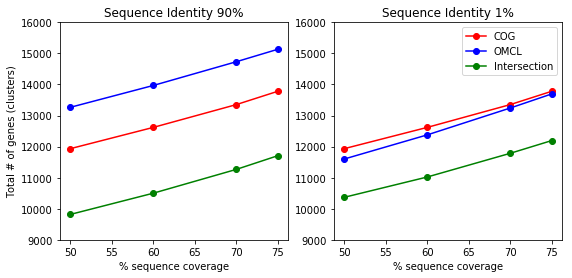

In [131]:

print(sum(clusters_S1_e0[["C{}_S1_e0_COG".format(str(c)) for c in C]].values))
C = [50, 60, 70, 75]
f = plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.plot(C, sum(clusters_S90_e0[["C{}_S90_e0_COG".format(str(c)) for c in C]].values), "-or")
plt.plot(C, sum(clusters_S90_e0[["C{}_S90_e0_OMCL".format(str(c)) for c in C]].values), "-ob")
plt.plot(C, sum(clusters_S90_e0[["C{}_S90_e0_Intersection".format(str(c)) for c in C]].values), "-og")
plt.ylim(9000, 16000)

plt.ylabel("Total # of genes (clusters)")
plt.xlabel("% sequence coverage")
plt.title("Sequence Identity 90%")
plt.subplot(122)
plt.plot(C, sum(clusters_S1_e0[["C{}_S1_e0_COG".format(str(c)) for c in C]].values), "-or", label="COG")
plt.plot(C, sum(clusters_S1_e0[["C{}_S1_e0_OMCL".format(str(c)) for c in C]].values), "-ob", label = "OMCL")
plt.plot(C, sum(clusters_S1_e0[["C{}_S1_e0_Intersection".format(str(c)) for c in C]].values), "-og", label = "Intersection")
plt.xlabel("% sequence coverage")
plt.title("Sequence Identity 1%")
plt.ylim(9000, 16000)
plt.legend()


In [104]:
clusters.head()

,C60_S1_e0_COG,C60_S1_e0_OMCL,C60_S1_e0_Intersection,C60_S90_e0_COG,C60_S90_e0_OMCL,C60_S90_e0_Intersection,C60_S1_e1_COG,C60_S1_e1_OMCL,C60_S1_e1_Intersection,C60_S90_e1_COG,...,C70_S90_e0_Intersection,C50_S70_e1_COG,C50_S70_e1_OMCL,C50_S70_e1_Intersection,C75_S70_e0_COG,C75_S70_e0_OMCL,C75_S70_e0_Intersection,C75_S1_e0_COG,C75_S1_e0_OMCL,C75_S1_e0_Intersection
1.0,5553.0,5294.0,4901.0,5553.0,6571.0,5032.0,5553.0,0.0,0.0,5553.0,...,5680.0,4995.0,0.0,0.0,6497.0,6984.0,5992.0,6497.0,6403.0,5926.0
2.0,1250.0,1202.0,1062.0,1250.0,1386.0,883.0,1097.0,1074.0,946.0,1097.0,...,988.0,1001.0,1114.0,770.0,1406.0,1519.0,1127.0,1406.0,1367.0,1210.0
3.0,578.0,566.0,479.0,578.0,641.0,399.0,507.0,504.0,429.0,507.0,...,436.0,488.0,507.0,361.0,657.0,665.0,482.0,657.0,637.0,534.0
4.0,427.0,411.0,341.0,427.0,462.0,291.0,389.0,370.0,312.0,389.0,...,299.0,371.0,394.0,287.0,421.0,450.0,319.0,421.0,416.0,347.0
5.0,274.0,283.0,218.0,274.0,309.0,170.0,232.0,230.0,183.0,232.0,...,186.0,223.0,227.0,157.0,302.0,311.0,214.0,302.0,300.0,231.0


In [15]:

def plotClusterSizes(C, S): #both could be lists
    
    fig, axs = plt.subplots(len(C),len(S), sharex=True, sharey=True)
    
    fig.set_size_inches(20.5, 14.5)
    conds = [(c,s) for c in C for s in S]
    coords = [(x, y) for x in range(len(C))for y in range(len(S))]
    for co, cd in zip(coords, conds):
        df = gh_df.loc["id_C{}_S{}".format(cd[0], cd[1])]  
        df.drop(0.0, axis='index', inplace=True)
        x = list(df.index)
        pan = df.pan
        a = axs[co[0], co[1]]
        a.bar(x, pan)
        a.set_title("C{}_S{}".format(cd[0], cd[1]))
        a.set_xlabel("# homologs in cluster")
        a.set_ylabel("# of clusters")
        a.set_xticks(list(x))

In [18]:
from operator import itemgetter

def plotClusters(cl, name): #given a list of columns plot the subset of 3 differnt algs, + total

    for alg in ["COG", 'OMCL', 'Intersection']:
        col_names = [c for c in cl if alg in c]
        df = clusters[col_names]
        tots = list(df.sum(axis =0))
        new_df = pd.DataFrame(tots, columns = ['Total'], index = list(df.columns)).T

        new_df = pd.concat([new_df, df[0:20]], axis = 0)  
        new_col_order = [tuple(c.split("_")) for c in list(new_df.columns)]
        new_col_order = sorted(new_col_order, key=itemgetter(2, 1))
        new_col_order = ["_".join(c) for c in new_col_order]
        new_df = new_df[new_col_order]

        ax = new_df.plot(kind = 'bar', figsize = (15, 10), width = 0.9, 
                         colormap = "Dark2" )
        
        title = name +"_" + alg
        ax.set_title(title, fontsize = 18)
        ax.set_ylim(0, 13000)
        ax.set_ylabel("# of orthologous groups", fontsize = 18)
        ax.set_xlabel("orthologous group size", fontsize = 18)
        fig = ax.get_figure()
        #plt.plot((-1, 1), (8200, 8200), 'k-')
        #plt.plot((15, 17), (2300, 2300), 'k-')
        fig.savefig("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-01-16-sync-genomes/figures/{}.png".format(title))

       # ("#666547", "#fb2e01", "#6fcb9f", "#b3ecec", "#ffe28a", "#fffeb3")

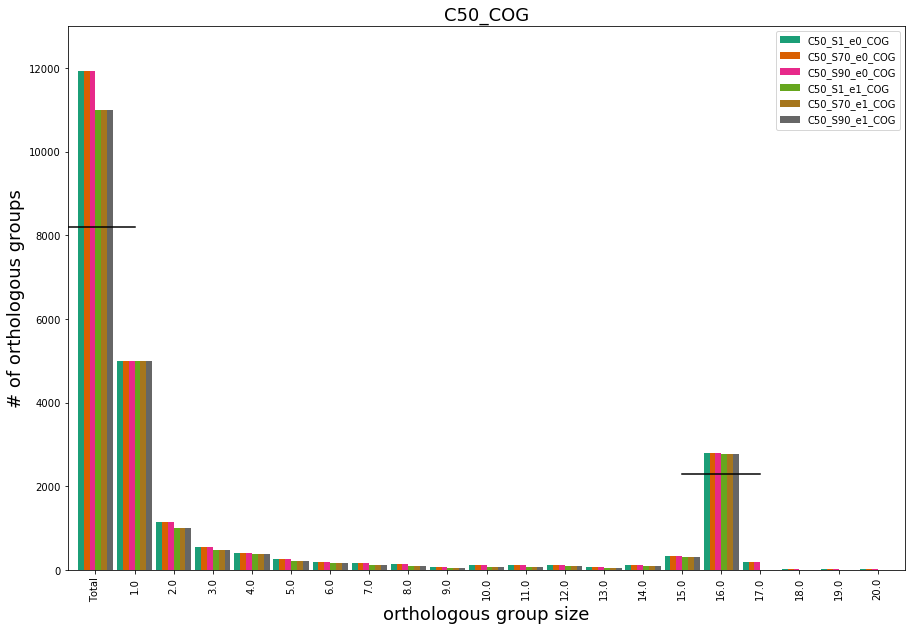

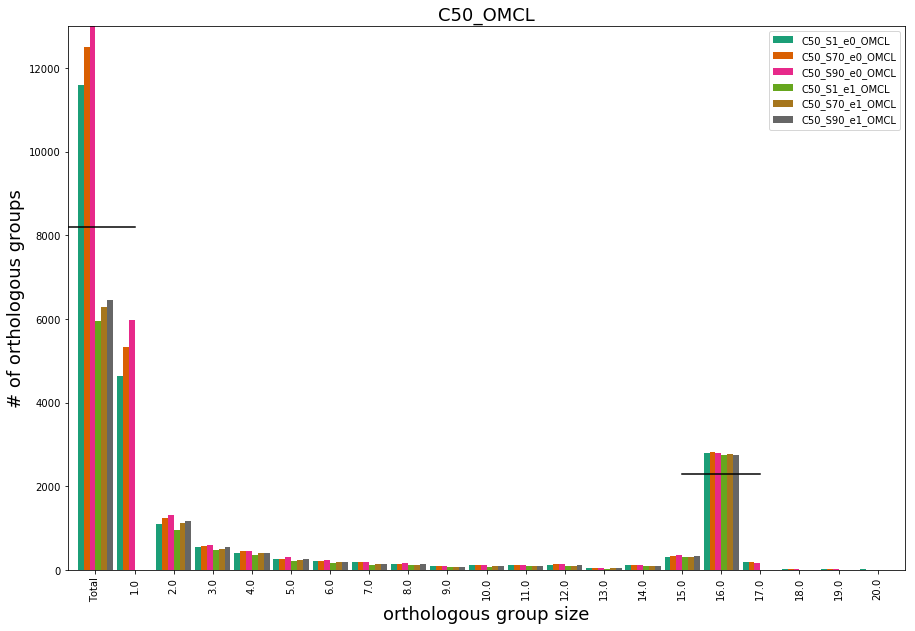

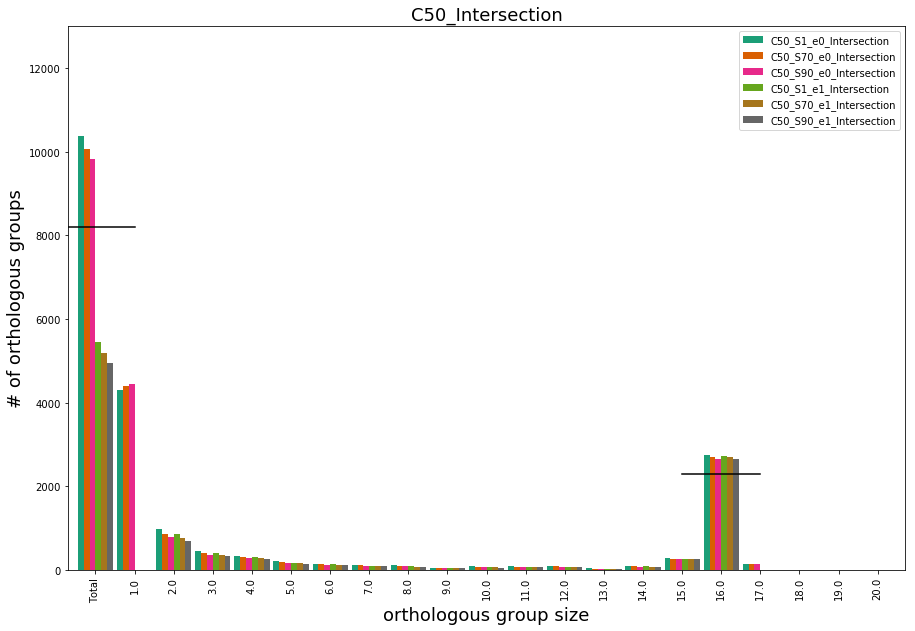

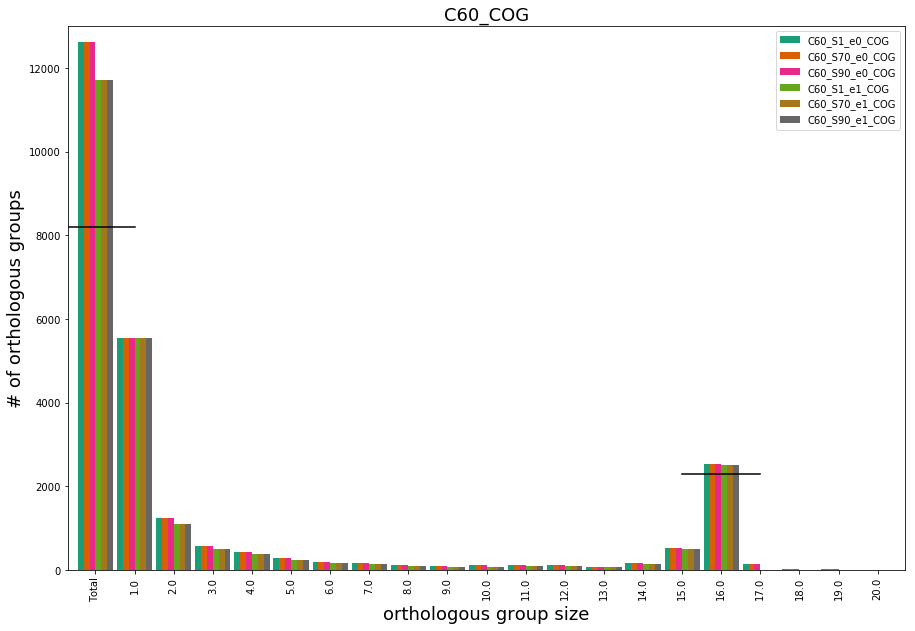

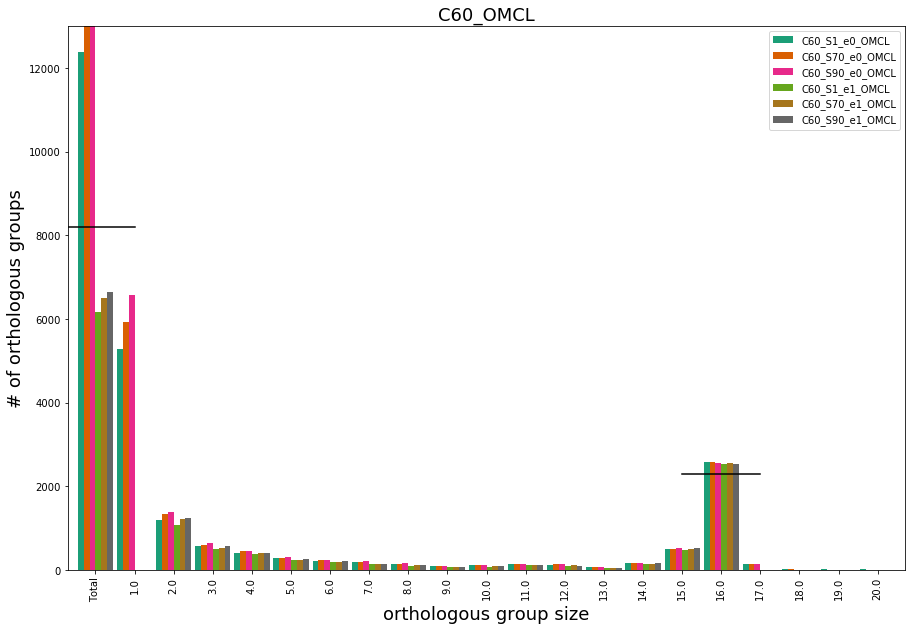

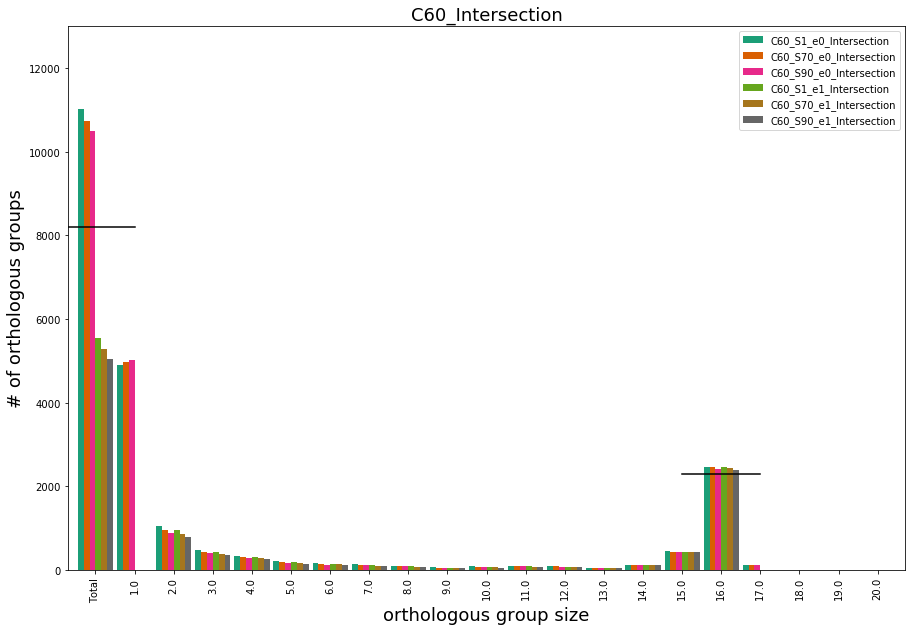

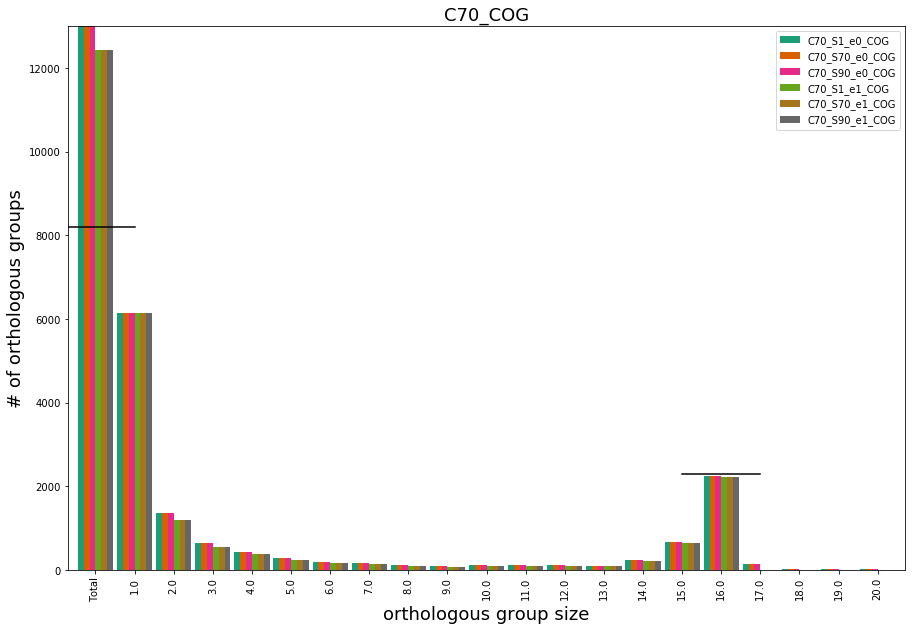

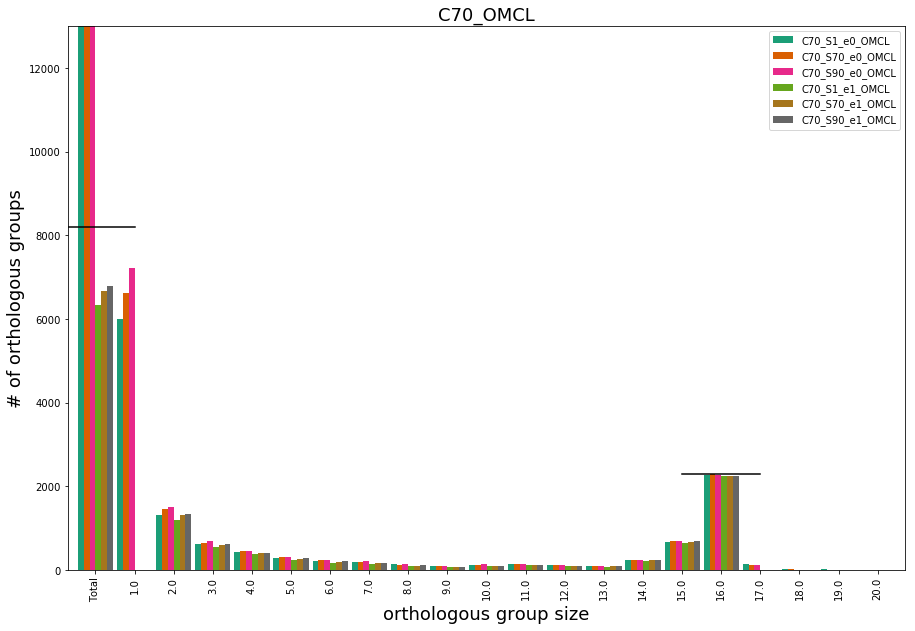

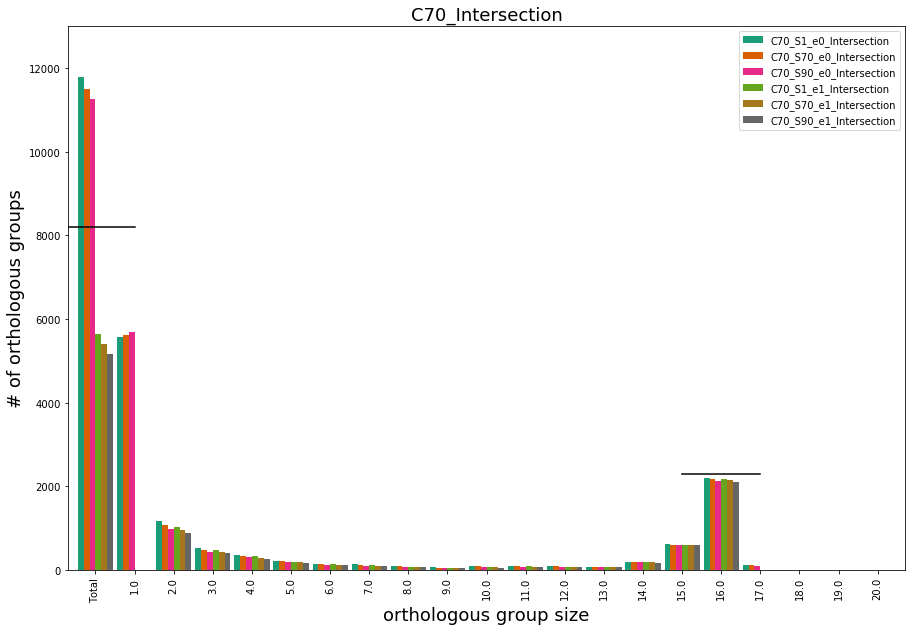

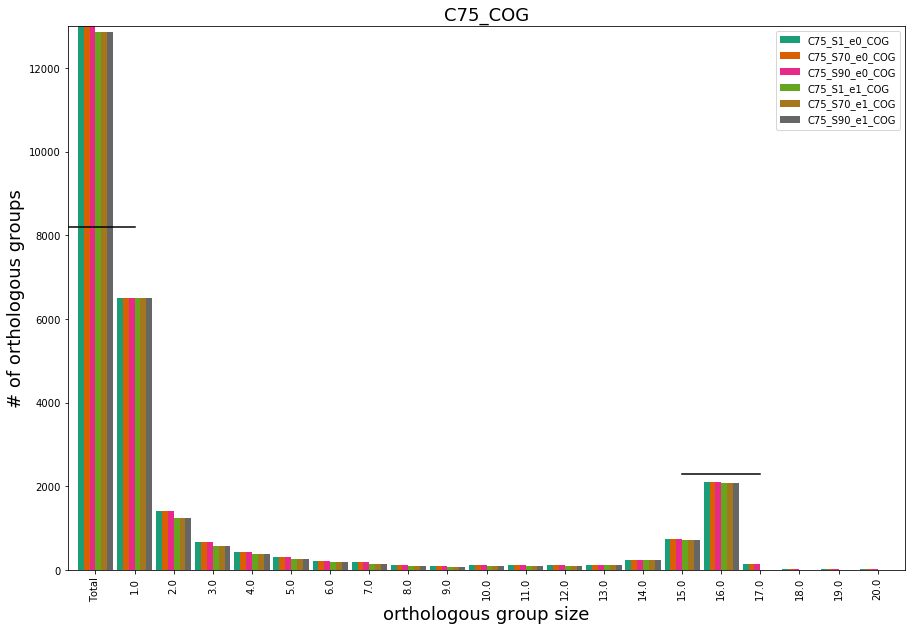

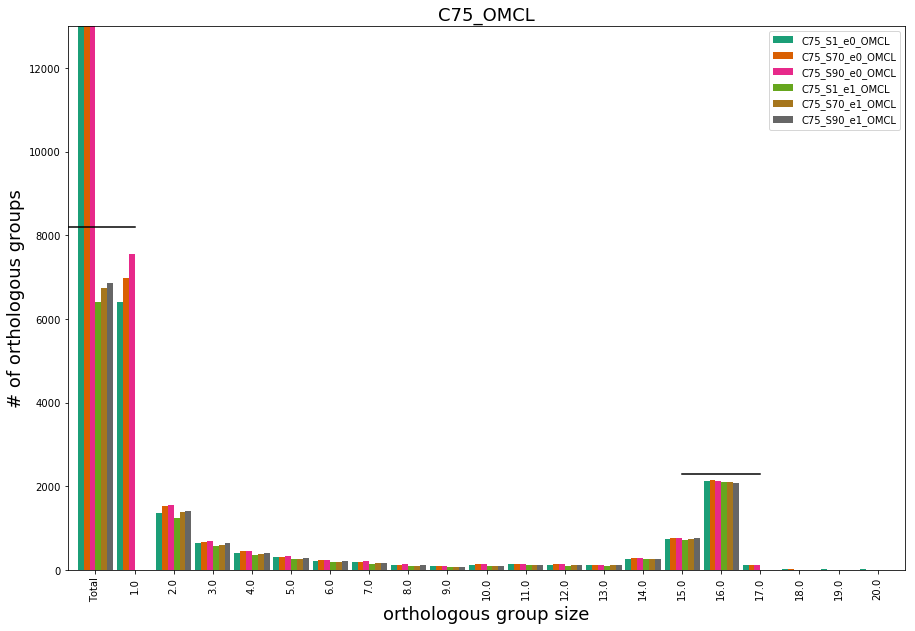

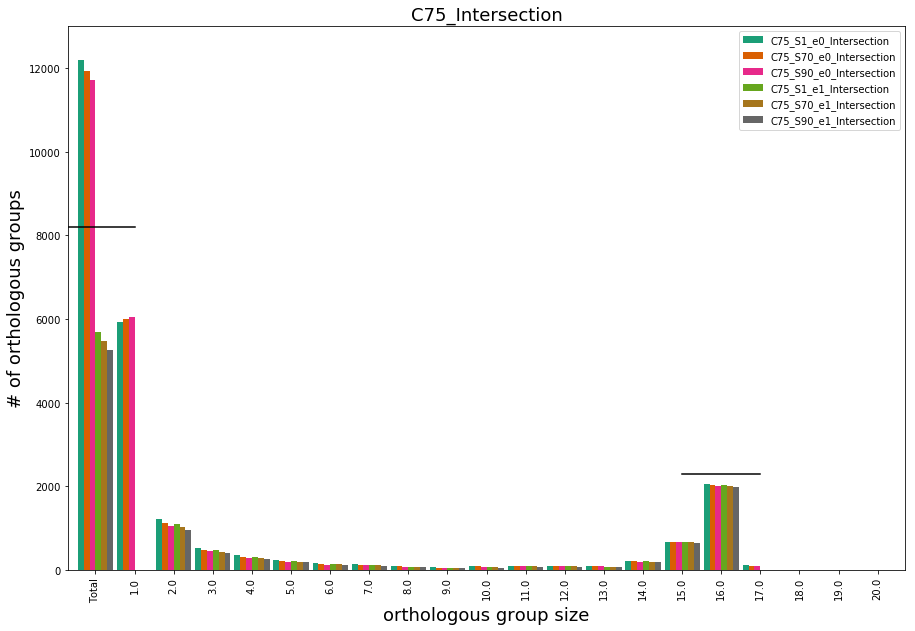

In [206]:
# Want to plot all C50 columns
# First subset the dataframe
C = ['C50', 'C60', 'C70', 'C75']

for c in C:
    name = c
    cols = [x for x in list(clusters.columns) if c in x]
    plotClusters(cols, name)
        

In [14]:
clusters_e0 = clusters[[x for x in clusters.columns if "e0" in x]]
clusters_e0.head()

,C60_S1_e0_COG,C60_S1_e0_OMCL,C60_S1_e0_Intersection,C60_S90_e0_COG,C60_S90_e0_OMCL,C60_S90_e0_Intersection,C60_S70_e0_COG,C60_S70_e0_OMCL,C60_S70_e0_Intersection,C70_S1_e0_COG,...,C50_S70_e0_Intersection,C70_S90_e0_COG,C70_S90_e0_OMCL,C70_S90_e0_Intersection,C75_S70_e0_COG,C75_S70_e0_OMCL,C75_S70_e0_Intersection,C75_S1_e0_COG,C75_S1_e0_OMCL,C75_S1_e0_Intersection
1.0,5553.0,5294.0,4901.0,5553.0,6571.0,5032.0,5553.0,5941.0,4973.0,6139.0,...,4397.0,6139.0,7216.0,5680.0,6497.0,6984.0,5992.0,6497.0,6403.0,5926.0
2.0,1250.0,1202.0,1062.0,1250.0,1386.0,883.0,1250.0,1346.0,961.0,1356.0,...,871.0,1356.0,1494.0,988.0,1406.0,1519.0,1127.0,1406.0,1367.0,1210.0
3.0,578.0,566.0,479.0,578.0,641.0,399.0,578.0,594.0,427.0,635.0,...,404.0,635.0,685.0,436.0,657.0,665.0,482.0,657.0,637.0,534.0
4.0,427.0,411.0,341.0,427.0,462.0,291.0,427.0,454.0,314.0,431.0,...,311.0,431.0,463.0,299.0,421.0,450.0,319.0,421.0,416.0,347.0
5.0,274.0,283.0,218.0,274.0,309.0,170.0,274.0,291.0,193.0,289.0,...,179.0,289.0,317.0,186.0,302.0,311.0,214.0,302.0,300.0,231.0


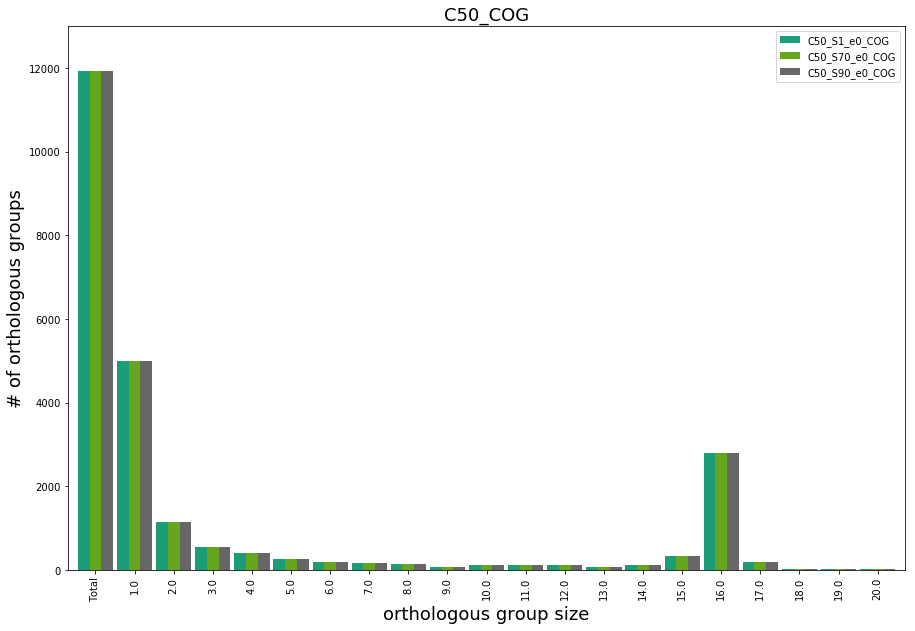

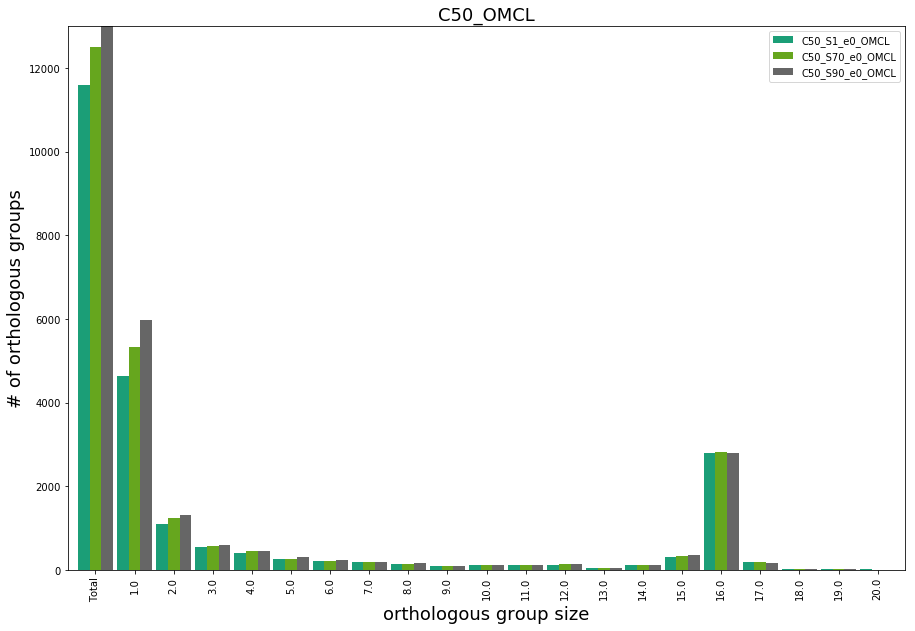

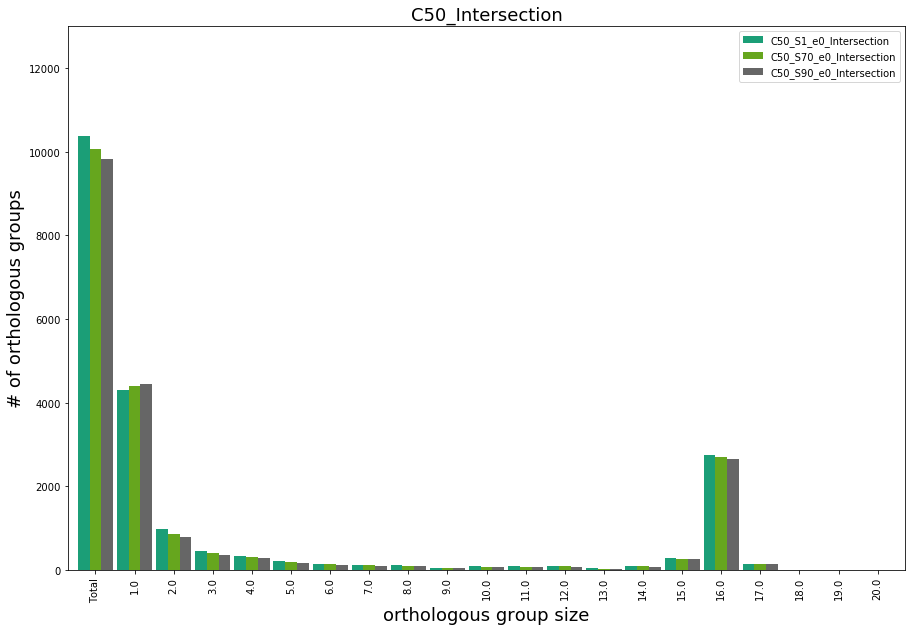

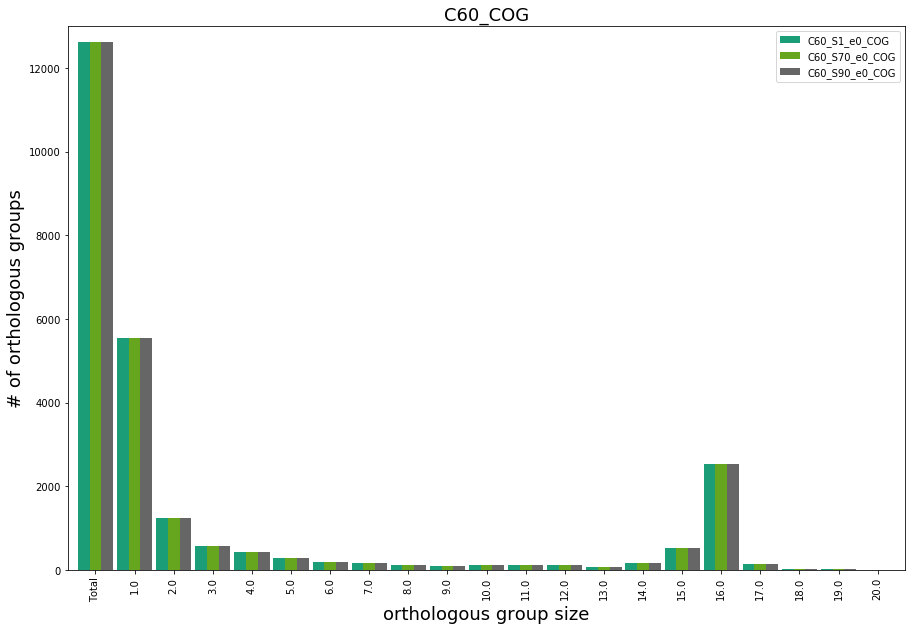

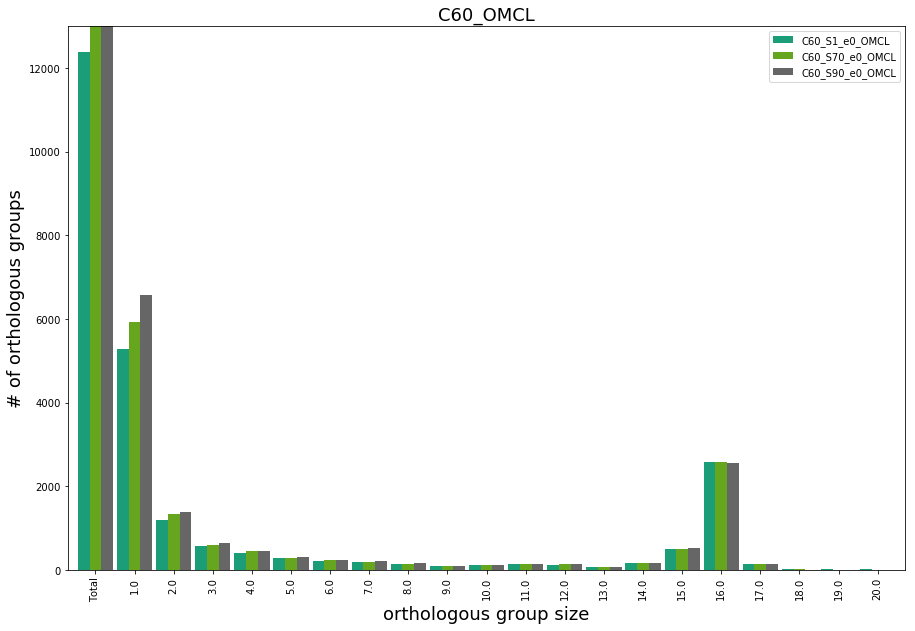

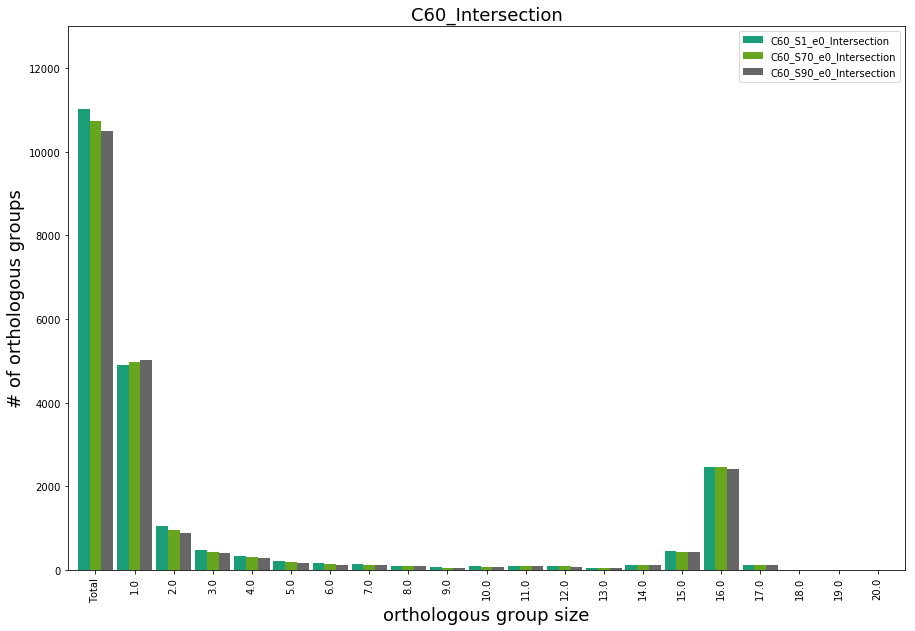

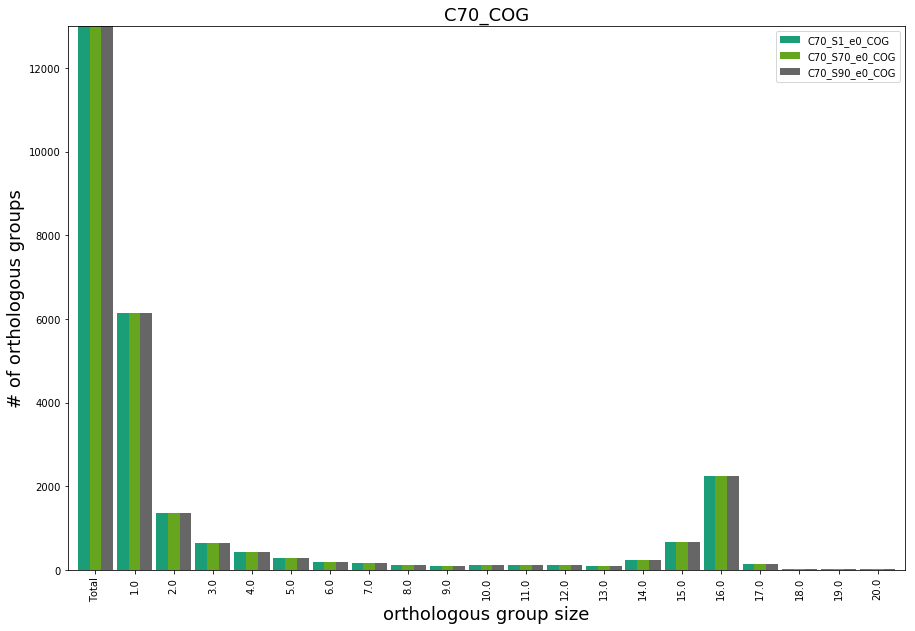

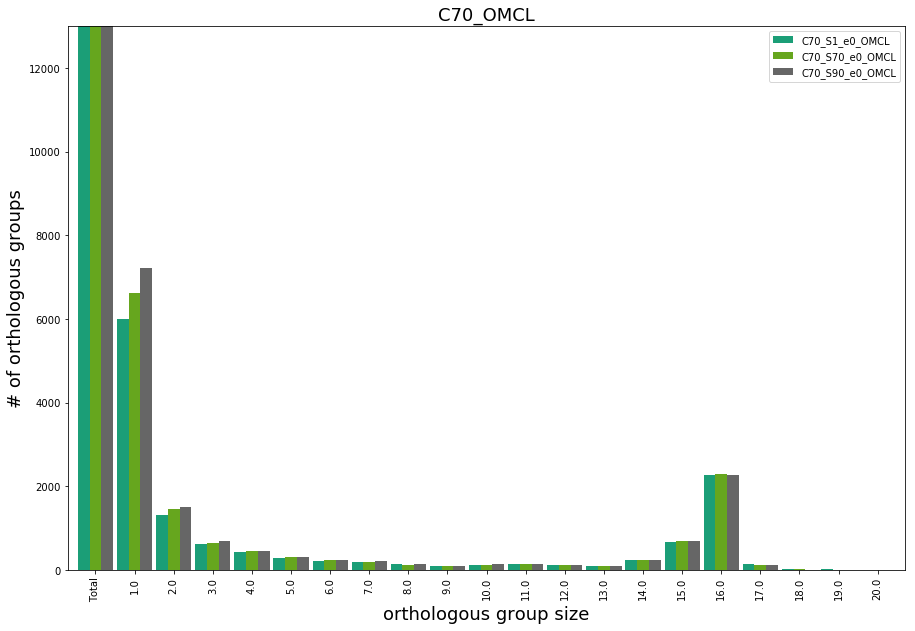

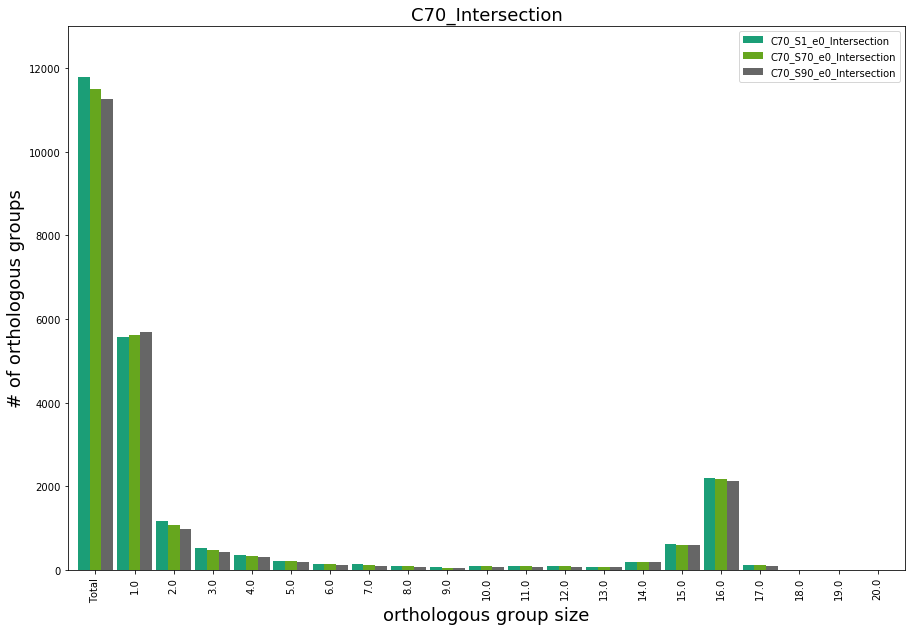

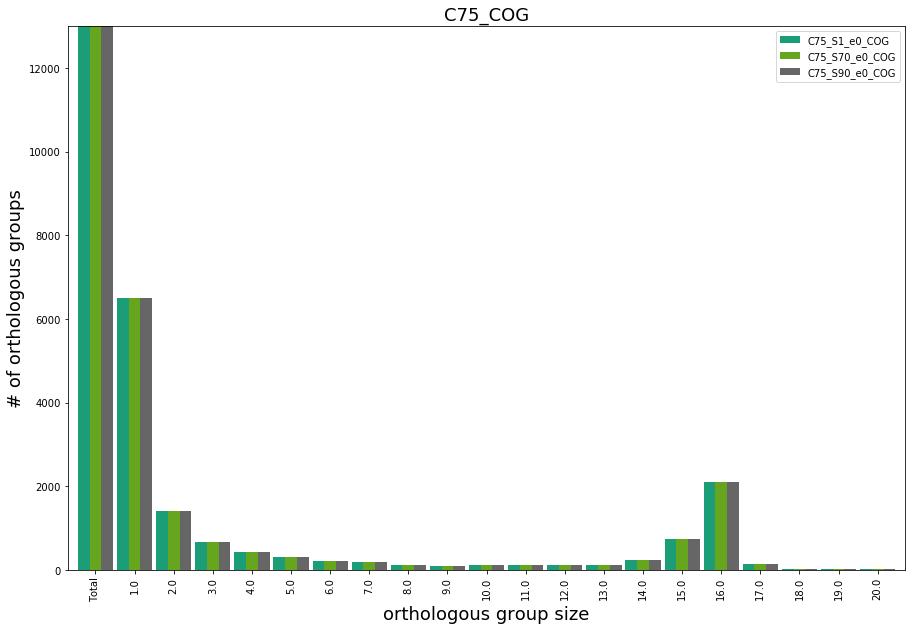

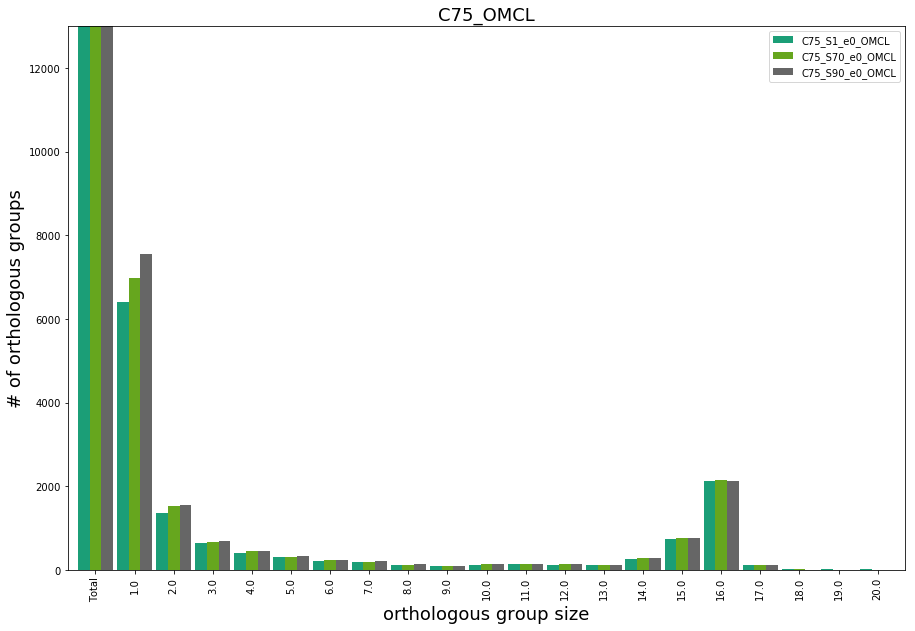

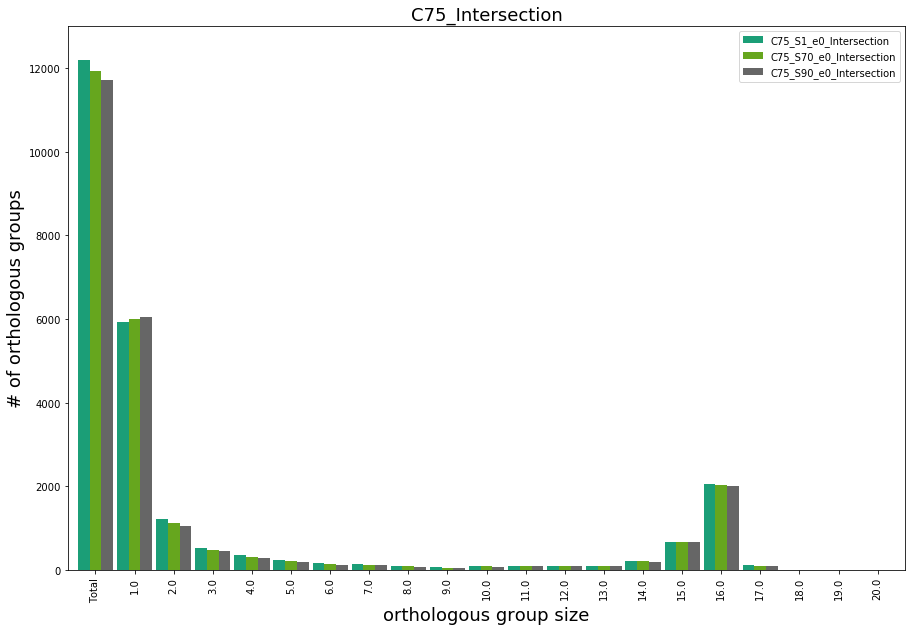

In [19]:
C = ['C50', 'C60', 'C70', 'C75']

for c in C:
    name = c
    cols = [x for x in list(clusters_e0.columns) if c in x]
    plotClusters(cols, name)